<a href="https://colab.research.google.com/github/PPatrickGU/ROB311/blob/master/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ROB311 TP1** 

**Implementing the algorithm of value iteration** 

*Author: Yan CHEN & Dajing GU*

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import time
import random

## **Initialize the parameters**

In [3]:
iteration = 0 # Initialize the number of iteration
gamma = 0.9 # Define the discounted numer
Value = np.array([0., 0., 0., 0.]) # Initialize value
R = np.array([0, 0, 1, 10]) # Define the rewards
# Define the transition matrix
T = np.array([[[0, 0, 0, 0],
               [0, 0.75, 0, 0.25],
               [0.75, 0, 0, 0.25],
               [1, 0, 0, 0]],
              [[0, 1, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 0]],
              [[0, 0, 1, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 0],
               [0, 0, 0, 0]]])
RMS = [] 
policies = [[1, 0, 0, 0],
            [2, 0, 0, 0]]


## **Function creation and Code Testing**

In [4]:
def plot(RMS, iteration, list_values,):
    fig = plt.figure(figsize=(25, 8))
    # Plot the figure of Value evolution
    plt.subplot(1, 2, 1)
    plt.xlabel('Iteration')
    plt.ylabel('value')
    plt.title("Value evolution")
    for i in range(len(list_values)):
      x = np.arange(len(list_values[0]))
      y = list_values[i]
      plt.plot(x, y, label="V"+str(i))
      plt.legend(loc='best')
      
    # Plot the figure of RMS-Iteration
    plt.subplot(1, 2, 2)
    plt.xlabel('Iteration')
    plt.ylabel('RMS')
    plt.title("RMS-Iteration")
    x = np.arange(1, iteration+1)
    y = RMS
    plt.plot(x, y)

V before trainging:  [0. 0. 0. 0.]
PI before trainging:  [2, 0, 0, 0] 

execution time:  0.024427413940429688 s
Iteration times : 144 

V after trainging:  [14.18563508 15.76181722 15.69789427 22.76707116]
PI after trainging:  [1, 0, 0, 0]


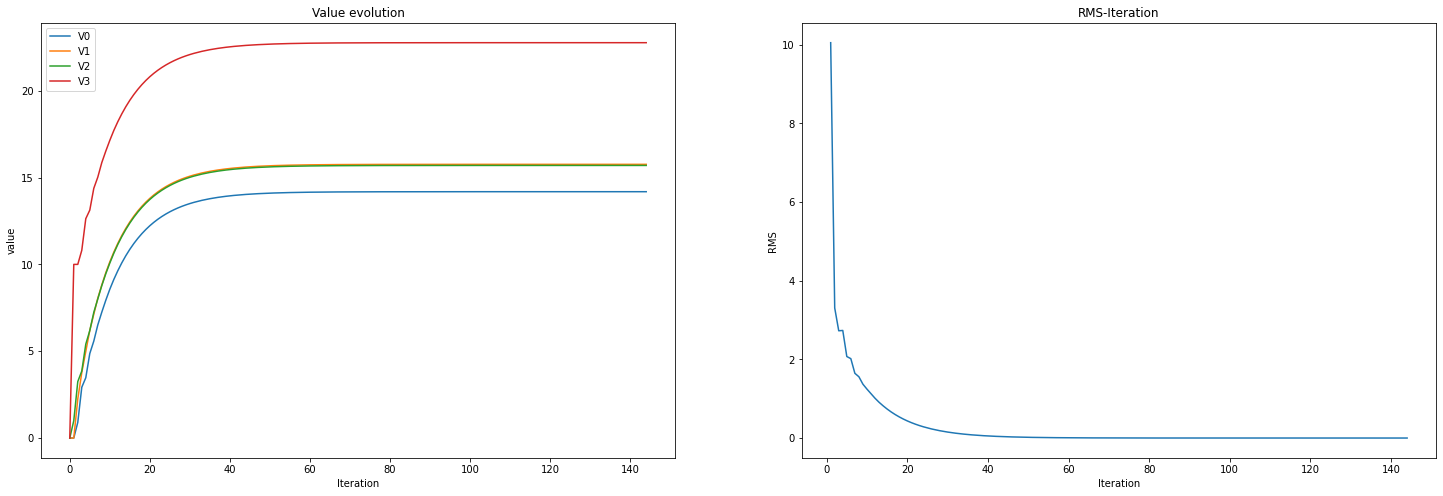

In [5]:
# variable to store every training result, which will further used to plot
PI = policies[random.randint(0, 1)]  # initialize randomly PI
list_values = [[Value[0]], [Value[1]], [Value[2]], [Value[3]]]
print('V before trainging: ', Value)
print('PI before trainging: ', PI, '\n')

start = time.time() # Record the start time of iteration
while True :
  Value_new = np.array([0., 0., 0., 0.])
  for s in range(len(Value)):
    Value_pi = []
    for a in range(T.shape[0]):
      # Calulate the new value
      V = R[s] + gamma*np.dot(T[a, s, :], Value) 
      Value_pi.append(V)
    Value_new[s] = max(Value_pi)
    list_values[s].append(Value_new[s]) 
    PI[s] = Value_pi.index(max(Value_pi)) # update PI

  diff = np.sqrt(np.sum(np.power(Value_new - Value, 2))) # Calculate the RMS
  RMS.append(diff)
  iteration += 1
  # Judge si RMS is smaller than threshold
  if diff < 10**-6:
    break
  else:
    # Assign the value of new value to previous value and continue iteration
    Value = Value_new
end = time.time() # Record the end time of iteration
print('execution time: ', end-start, 's')
print('Iteration times :', iteration, '\n')

print('V after trainging: ', Value_new)
print('PI after trainging: ', PI)
plot(RMS, iteration, list_values) # Plot these figures of Value evolution and RMS-Iteration


## **Appendix: a second methode in using the dictionary**

V before trainging:  [0.80281869 0.81190278 0.4558248  0.28165134]
PI before trainging:  ['a1' 'a0' 'a0' 'a0']
V after trainging:  [14.16866568 15.74296187 15.68300413 22.75179911]
PI after trainging:  ['a1' 'a0' 'a0' 'a0']


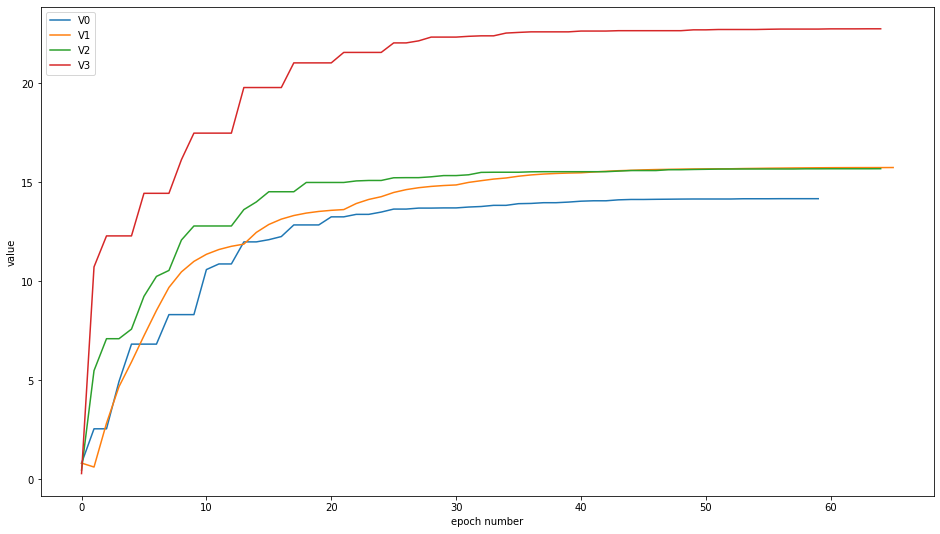

In [6]:
gamma = 0.9
x = 0.25
y = 0.25
transitions = { 'a0': np.array([[0, 0, 0, 0], 
                  [0, 1 - x, 0, x], 
                  [1 - y, 0, 0, y], 
                  [1, 0, 0, 0]]) ,

         'a1': np.array([[0, 1, 0, 0], 
                 [0, 0, 0, 0], 
                 [0, 0, 0, 0], 
                 [0, 0, 0, 0]]),
               
         'a2': np.array([[0, 0, 1, 0], 
                 [0, 0, 0, 0], 
                 [0, 0, 0, 0], 
                 [0, 0, 0, 0]])}

rewards = np.array([0, 0, 1, 10])
policies = np.array([['a1', 'a0', 'a0', 'a0'],
           ['a2', 'a0', 'a0', 'a0']])
states = np.array([0, 1, 2, 3])
V = np.random.rand(4) 
PI = np.array(['a1', 'a0', 'a0', 'a0'])

def RMS(V0, V1):
  """
  Calculate the difference between two Utilities
  """
  return 1/len(states) * (((V0 - V1)**2).sum())

def max_sum(V, state, PI, policies, states):
  """
  Calculate the maximum of sum
  """
  max_sum = 0
  for (action, transition_matrix) in transitions.items():
    sum = np.dot(transition_matrix[state, :], V)
    if sum > max_sum:
      max_sum = sum
      PI[state] = action
  return max_sum

def Update_V(V, state, policies, PI, states):
  """
  Calculate and update V[state]
  """
  V[state] = rewards[state] + gamma * max_sum(V, state, PI, policies, states)
  return V[state] 

def plot(list_values):
    fig = plt.figure(figsize=(16, 9))
    plt.xlabel('epoch number')
    plt.ylabel('value')
    for i in range(len(V)):
      x = np.arange(len(list_values[i]))
      y = list_values[i]
      plt.plot(x, y, label="V"+str(i))
      plt.legend(loc='best')

epsilon = 0.0001
epoch = 500
# variable to store every training result, which will further used to plot
list_values = [[V[0]], [V[1]], [V[2]], [V[3]]]
print('V before trainging: ', V)
print('PI before trainging: ', PI)
counter = 0
new_V = 0

for m in range(epoch):
  state = random.randint(0, 3)     # initialize randomly first state
  old_V = new_V
  new_V = Update_V(V, state, policies, PI, states)       # update V value
  list_values[state].append(new_V)
  if counter > 50:                    # set a counter to avoid the overfitting 
    break
  elif RMS(old_V, new_V) < epsilon:
    counter += 1

print('V after trainging: ', V)
print('PI after trainging: ', PI)
plot(list_values)